In [1]:
import pandas as pd
import numpy as np

features_2 = pd.read_csv('features_2.csv')
features_2

,Phone_new,Чеки,Товары,Выручка,Товар/чек,Средний_чек,Чеки_выкуп,Товары_выкуп,Выручка_выкуп,Товар/чек_выкуп,...,Элитная техника,Инсталляция,"Хобби, досуг",НайдёшьДешевле,СкидкаСуммойПроцентомСЛимитом,Подарки,СкидкаДляСпособаОплаты,СкидкаНаКомплект,СкидкаНаТоварПоПромоСлову,БесплатнаяДоставкаНаСуммуКорзины
0,32565748-000000000,13,15,259458.0,1.15,19958.31,8.0,8.0,19757.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,32565748-535549565054 55,1,1,12430.0,1.00,12430.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,32565750-575448565151 а,1,2,53198.0,2.00,53198.00,1.0,2.0,53198.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,32565750-575448565151 а5,1,1,1590.0,1.00,1590.00,1.0,1.0,1590.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,43553240-575054413251+75,7,7,48557.0,1.00,6936.71,2.0,2.0,10129.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123102,57505548-48535350504991,1,1,999.0,1.00,999.00,1.0,1.0,999.0,1.0,...,0,0,0,0,0,0,0,0,0,0
123103,57544955-51485756555597,1,1,7700.0,1.00,7700.00,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
123104,57555656-55575253555698,1,1,4040.0,1.00,4040.00,1.0,1.0,4040.0,1.0,...,0,0,0,0,0,0,0,0,0,0
123105,57565352-52575050555092,1,1,1999.0,1.00,1999.00,1.0,1.0,1999.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [2]:
index_to_phone = features_2['Phone_new']
index_to_phone

0               32565748-000000000
1         32565748-535549565054 55
2          32565750-575448565151 а
3         32565750-575448565151 а5
4         43553240-575054413251+75
                    ...           
123102     57505548-48535350504991
123103     57544955-51485756555597
123104     57555656-55575253555698
123105     57565352-52575050555092
123106     57565355-57554952485597
Name: Phone_new, Length: 123107, dtype: object

In [4]:
features_2.drop(columns=['Phone_new'], inplace=True)

In [5]:
from sklearn.cluster import KMeans

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

y_pred = KMeans(n_clusters=6, **common_params).fit_predict(features_2)
y_pred

array([0, 1, 1, ..., 1, 1, 1], shape=(123107,), dtype=int32)

In [6]:
for i in range(6):
    cnt = (y_pred == i).sum()
    print(f'{i}: {cnt}')

0: 3640
1: 119090
2: 1
3: 27
4: 341
5: 8


For n_clusters = 2 The average silhouette_score is : 0.996073341671603
For n_clusters = 3 The average silhouette_score is : 0.9798056689313607
For n_clusters = 4 The average silhouette_score is : 0.95027329635468
For n_clusters = 5 The average silhouette_score is : 0.9502844805789252
For n_clusters = 6 The average silhouette_score is : 0.867751542401154
For n_clusters = 7 The average silhouette_score is : 0.8235021926558166
For n_clusters = 8 The average silhouette_score is : 0.8066018028489644
For n_clusters = 9 The average silhouette_score is : 0.6792350835782012
For n_clusters = 10 The average silhouette_score is : 0.6105292957071969


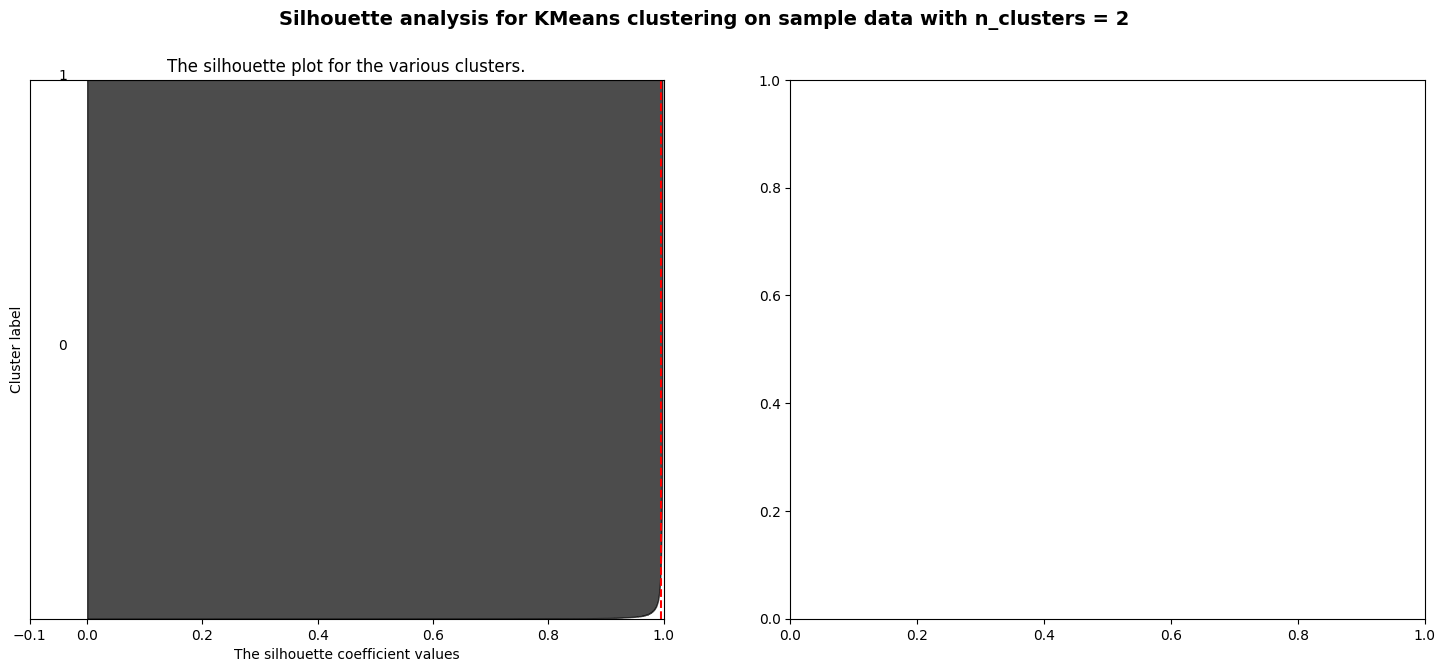

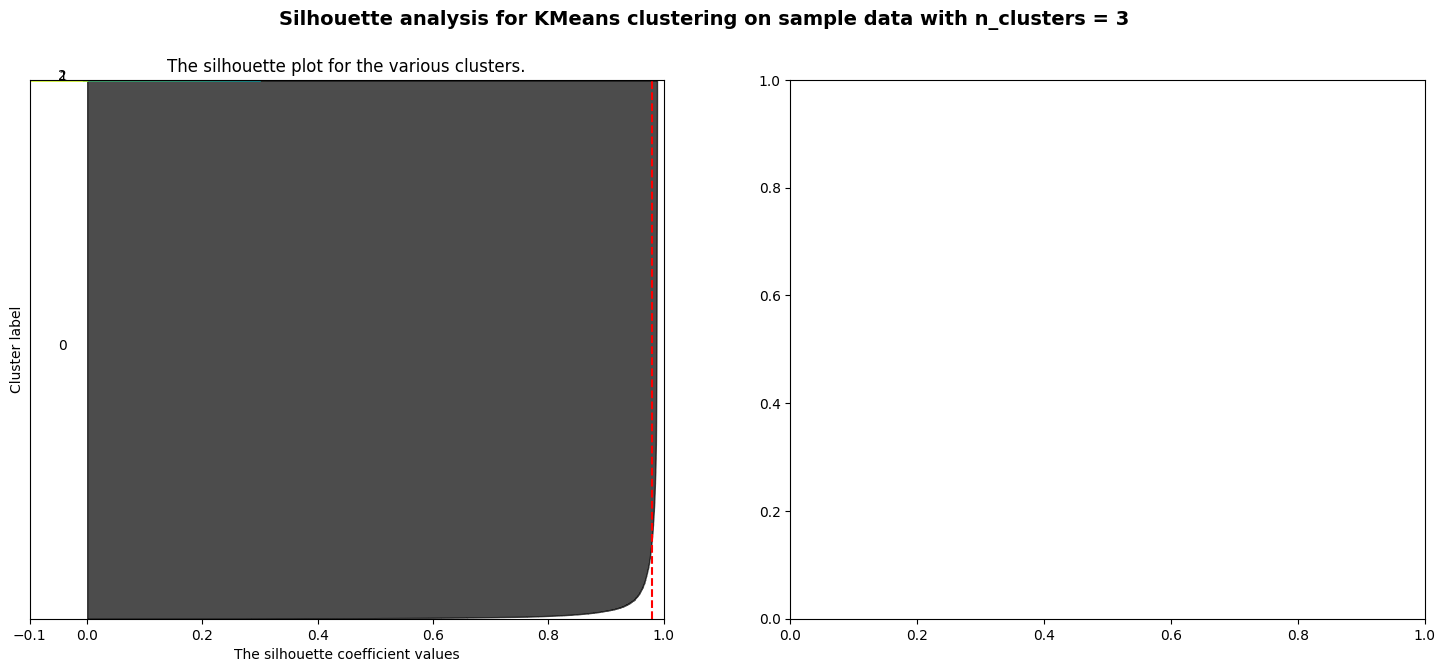

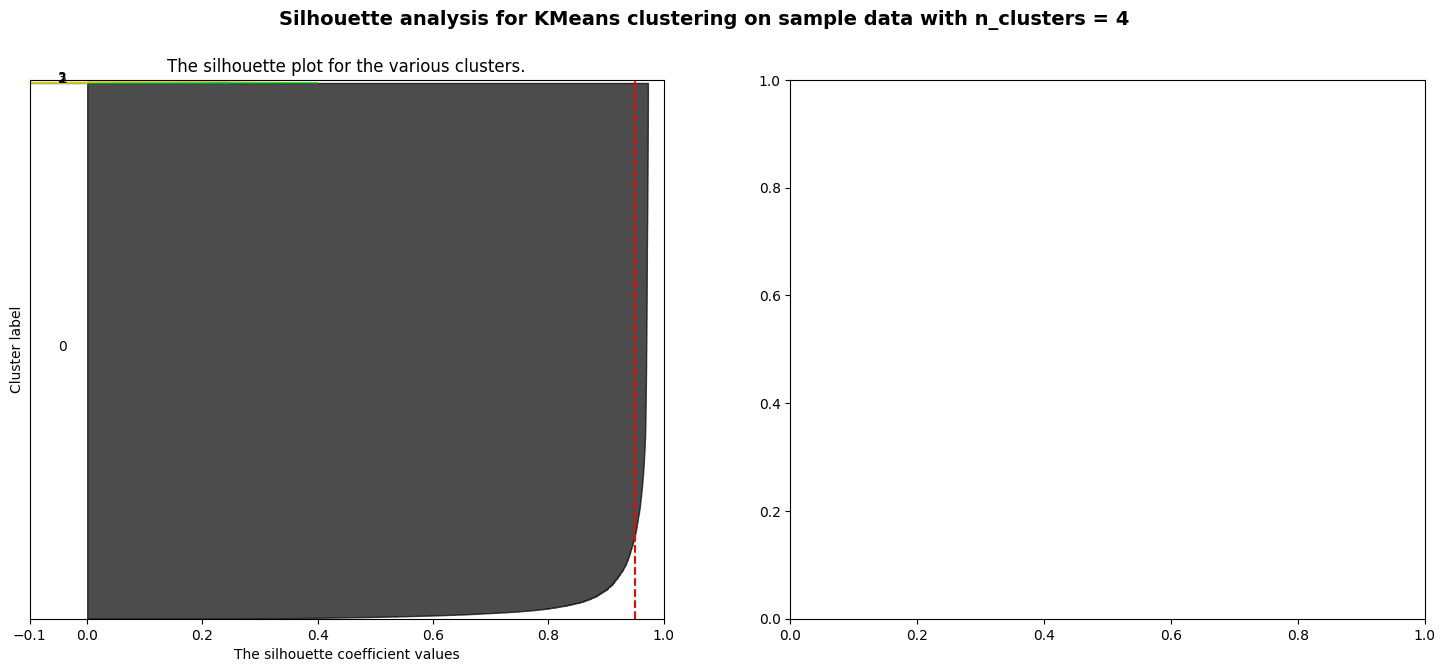

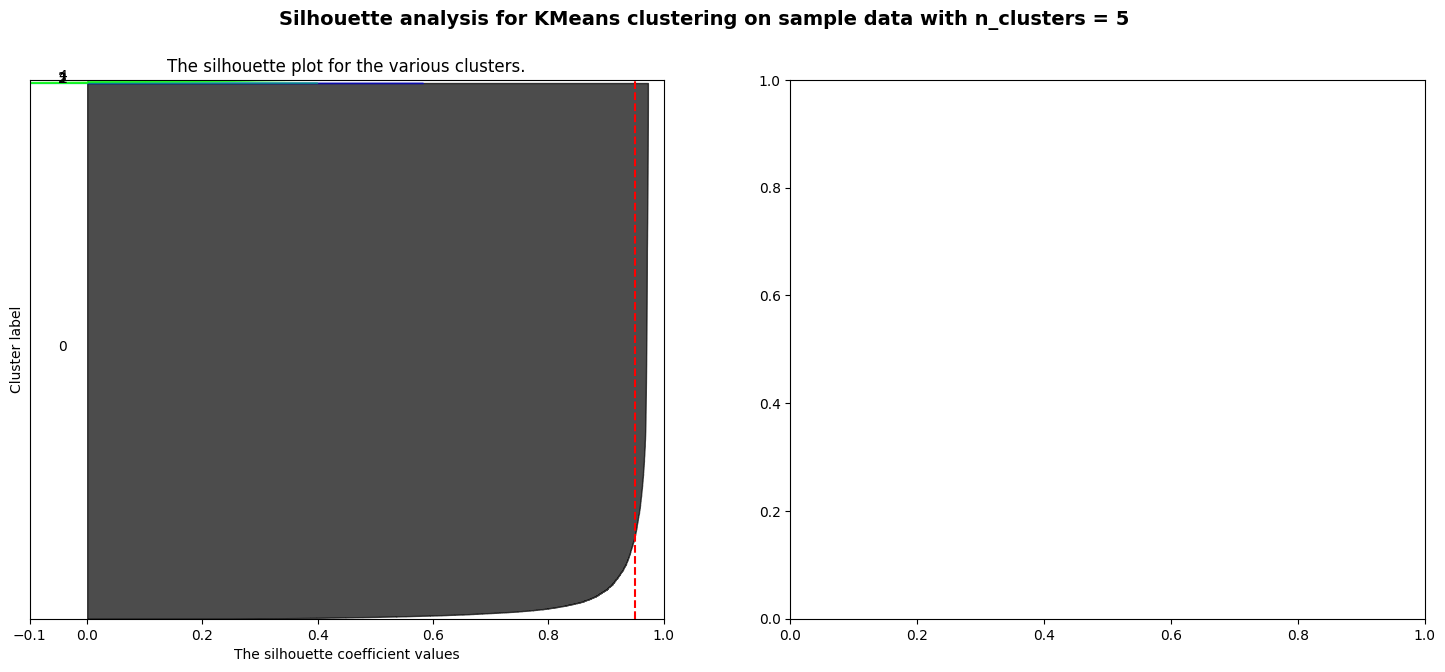

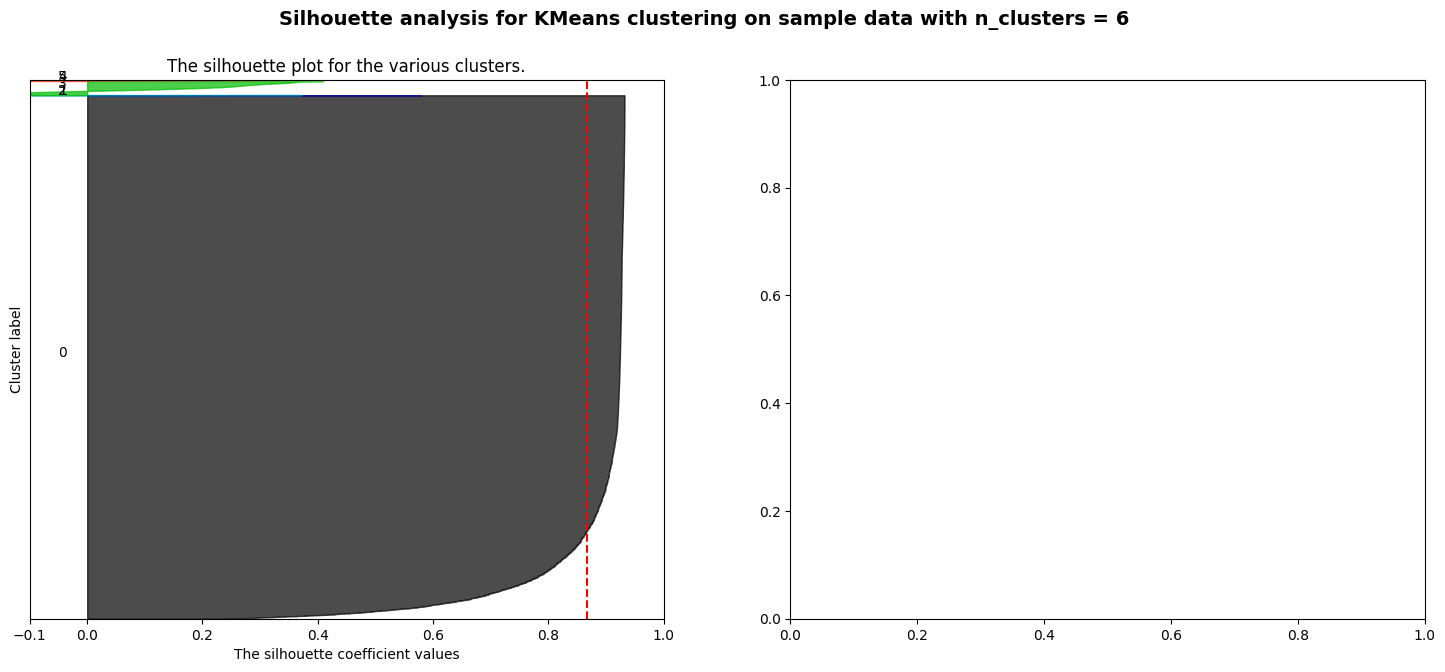

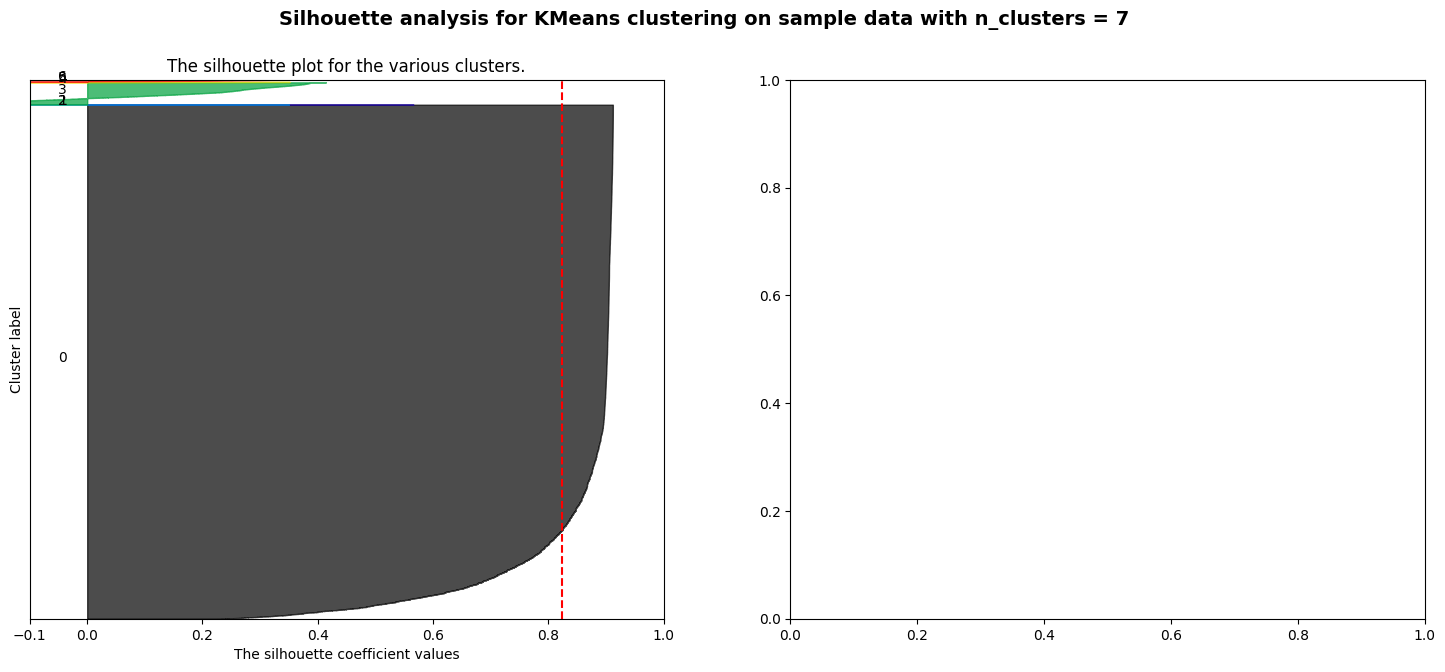

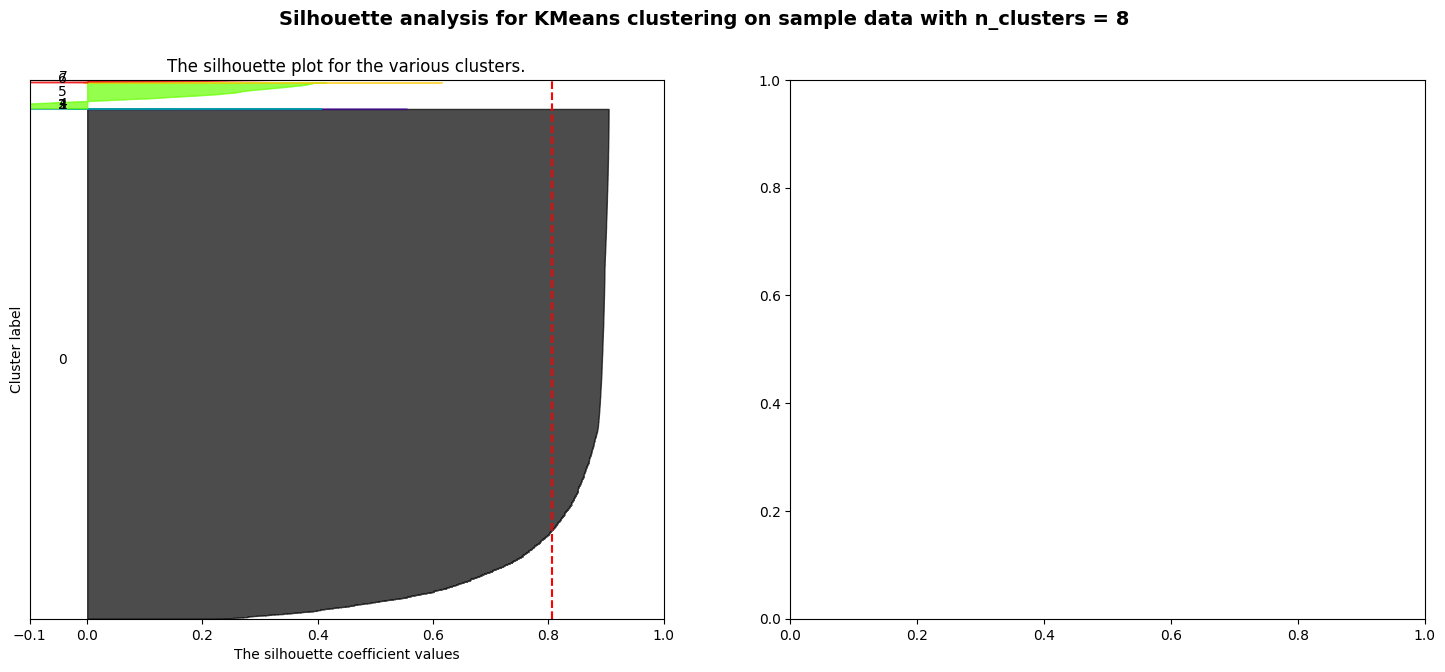

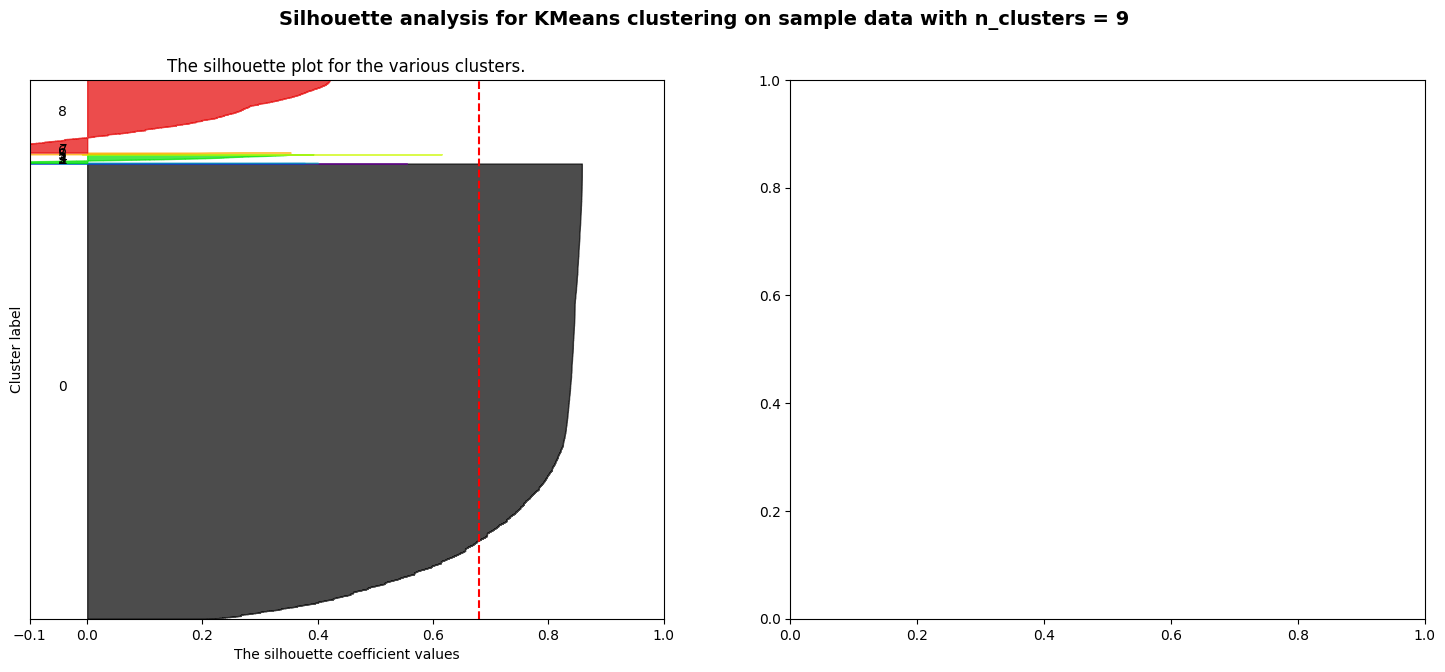

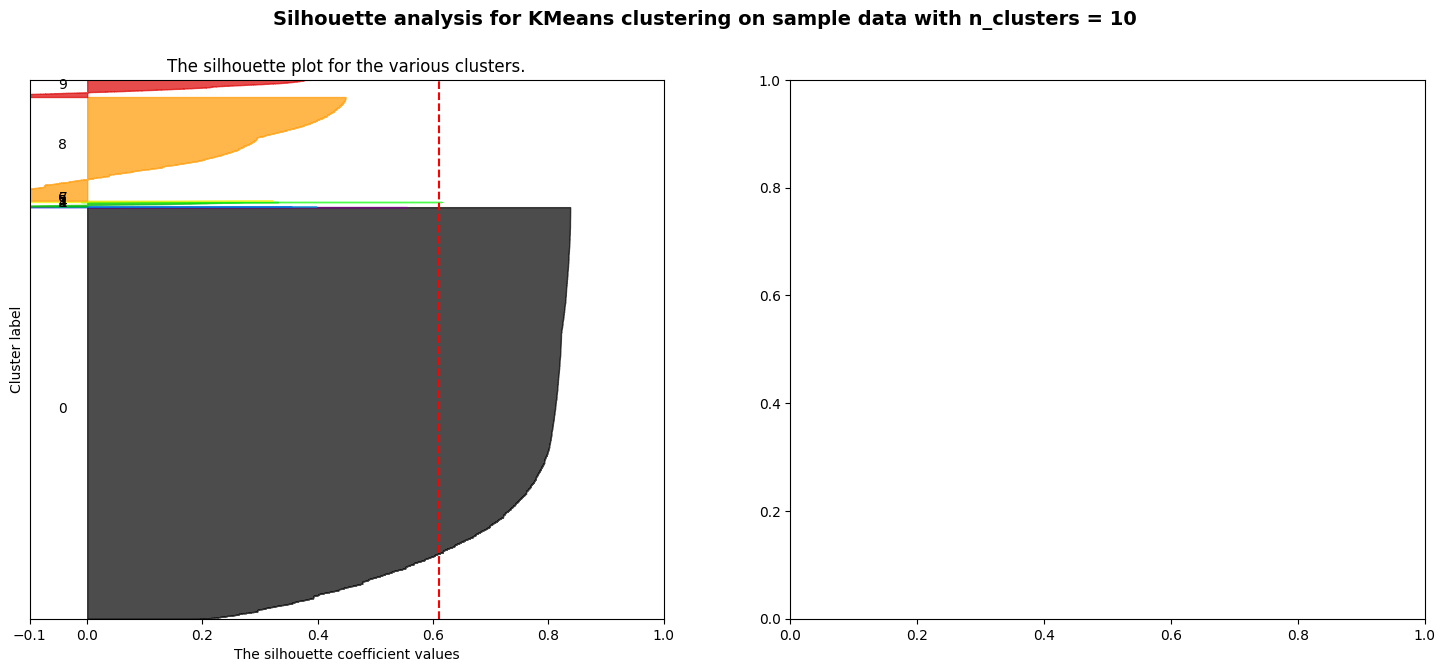

In [7]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(
    #     X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()